In [1]:
import requests
import pandas as pd

In [2]:
BASE_URL = "https://www.ntnu.no/studier/studier_i_utlandet/rapport/table.php"
payload = {
    'away_country':'default',
    'away_city': '', 
    'away_university': '',
    'home_university':'default',
    'searchOldReports':'yes',
    'home_faculty':'',
    'home_institute': '',
    'exchange_program':'default',
    'exchange_period':'default',
    'number-of-views':'1000',
    'advanced_search_enabled':'yes',
    'language':'no'
}
data = requests.get(BASE_URL, params = payload)

In [3]:
def text_array_for_row(row): 
    res = []
    for el in row.children:
        if el != '\n':
            res.append(el.text)
    return res

In [4]:
import json
import os
from dotenv import load_dotenv

load_dotenv()


def search_country(query: str) -> str: 
    payload = {
        'access_key': os.getenv("ACCESS_KEY"),
        'query': query,
    }
    data = requests.get("http://api.positionstack.com/v1/forward", params = payload)
    j = data.json()
    if 'data' not in j:
        print(f"Could not find: {query}")
        return "Unknown"
        
    if len(j['data']) == 0:
        print(f"Could not find: {query}")
        return "Unknown"
    return j['data'][0]['country'] 
    
print(search_country("Boston"))

United States


In [2]:
import pickle
countries = pickle.load(open("countries.pickle", "rb"))

In [3]:
df = pickle.load(open("data.pickle", "rb"))

In [7]:
len(df[df["Studieprogram"] == "Datateknologi"])

49

In [18]:
counts = pickle.load(open("country_counts.pickle", "rb"))
counts

United States    358
Italy            188
Australia        144
Germany          128
France            98
                ... 
Jamaica            1
Israel             1
Montenegro         1
Tunisia            1
Palestine          1
Name: Land, Length: 82, dtype: int64

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data.content.decode("utf8"), 'html.parser')

rows = soup.find_all("tr")

print(f"Num rows: {len(rows)}")
df = pd.DataFrame(list(map(lambda x: text_array_for_row(x), rows[1:])), columns=text_array_for_row(rows[0]))
df = df.dropna()

df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Num rows: 0


IndexError: list index out of range

In [ ]:
import tqdm
cities = df['By'].unique()
for city in tqdm.tqdm(cities): 
    if not city in countries:
        countries[city] = search_country(city)


 81%|████████  | 578/718 [00:00<00:00, 2410.48it/s]

Could not find: KU


 88%|████████▊ | 630/718 [00:20<00:03, 22.35it/s]  

Could not find: University of Helsinki/Helsingin Yliopisto
Could not find: Göteborgs universitet, Sahlgrenska Academy


 94%|█████████▍| 677/718 [00:40<00:04,  8.97it/s]

Could not find: SciencesPo - Lyon 2
Could not find: Université de Toulouse II le Mirail
Could not find: Norges permanente delegasjon i Genève
Could not find: SJTU


100%|██████████| 718/718 [00:54<00:00, 13.25it/s]


In [ ]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='no')

In [ ]:
for city, country in countries.items():
    if country is not None: 
        countries[city] = translator.translate(country)
    

In [ ]:
import pickle


with open('countries.pickle', 'wb') as handle:
    pickle.dump(countries, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

df['Land'] = df.apply(lambda x: countries[x['By']], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Land,By,Vertsinstitusjon,Hjemmeinstitusjon,Studieprogram,Periode
0,Germany,Berlin,TU Berlin,NTNU,Materialteknologi,Vår 2022
1,Denmark,københavn,Danmark tekniske universitet,NTNU,Bioteknologi MSBIOTECH,Vår 2022
2,Italy,Milano,Politecnico di Milano,NTNU,Produktutvikling og Produksjon,Vår 2022
3,Germany,München,Ludwig-Maximilian Universität (LMU),NTNU,Profesjonsstudiet i psykologi,Høst og vår 2021/22
4,Italy,Roma,La Sapienza,NTNU,I&amp;IKT - Geomatikk,Vår 2023


In [ ]:
df.to_pickle("data.pickle")

<AxesSubplot: >

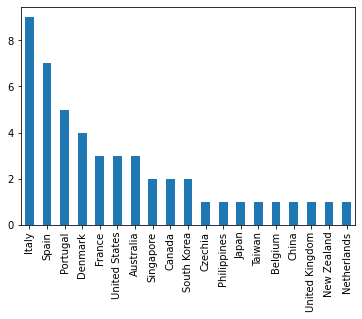

In [ ]:
df[df['Studieprogram'] == "Datateknologi"]['Land'].value_counts().head(20).plot(kind='bar')

<AxesSubplot: >

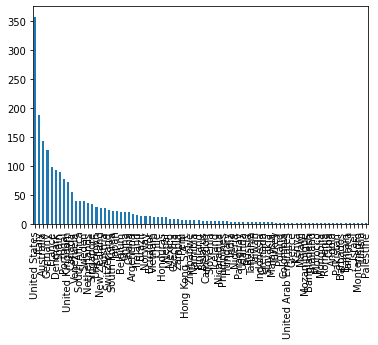

In [ ]:
df['Land'].value_counts()

In [ ]:
df.loc[df['Land'] == "United States", 'Land'] = 'United States of America'

In [ ]:
df['Land'].value_counts().to_pickle("country_counts.pickle")

df['Land'].value_counts().to_dict()

{'United States of America': 358,
 'Italy': 188,
 'Australia': 144,
 'Germany': 128,
 'France': 98,
 'Denmark': 94,
 'Spain': 89,
 'Portugal': 77,
 'United Kingdom': 72,
 'Canada': 56,
 'Venezuela': 39,
 'South Africa': 39,
 'Sweden': 39,
 'Netherlands': 37,
 'Singapore': 35,
 'Unknown': 30,
 'New Zealand': 27,
 'Austria': 27,
 'Switzerland': 24,
 'South Korea': 23,
 'Japan': 23,
 'Belgium': 21,
 'China': 20,
 'Ghana': 20,
 'Argentina': 18,
 'Ireland': 16,
 'Brazil': 14,
 'Norway': 13,
 'Ecuador': 13,
 'Vietnam': 12,
 'Chile': 12,
 'Honduras': 12,
 'Nepal': 12,
 'Mexico': 8,
 'Czechia': 8,
 'Zambia': 8,
 'Peru': 7,
 'Hong Kong S.A.R.': 7,
 'Zimbabwe': 7,
 'Namibia': 6,
 'Finland': 6,
 'Belarus': 5,
 'Cameroon': 5,
 'Slovenia': 5,
 'Iceland': 5,
 'Nicaragua': 5,
 'Philippines': 5,
 'Hungary': 5,
 'India': 4,
 'Nigeria': 4,
 'Paraguay': 4,
 'Uganda': 4,
 'Russia': 4,
 'Tanzania': 4,
 'Taiwan': 4,
 'Indonesia': 3,
 'Grenada': 3,
 'Slovakia': 3,
 'Malaysia': 3,
 'Turkey': 2,
 'Poland': 2,
